# 电影评论分类：二分类问题


二分类可能是机器学习最常解决的问题。我们将基于评论的内容将电影评论分类：正类和负类。
IMDB数据集
IMDB数据集有5万条来自网络电影数据库的评论；其中2万5千条用来训练，2万5千条用来测试，每个部分正负评论各占50%.
划分训练集、测试集的必要性：不能在相同的数据集上对机器学习模型进行测试。因为在训练集上模型表现好并不意味着泛化能力好(在没有见过的数据上仍然表现良好)，而我们关心的是模型的泛化能力.
和MNIST数据集类似，IMDB数据集也集成在Keras中，同时经过了预处理：电影评论转换成了一系列数字，每个数字代表字典中的一个单词。

In [1]:
#加载数据集，第一次运行时需要下载数据集
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
#将整数序列编码为二进制矩阵
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

#将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
# 模型定义
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
#编译模型
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [6]:
#配置优化器
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [7]:
#使用自定义的损失和指标
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy, 
              metrics=[metrics.binary_accuracy])

In [8]:
#留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
#训练模型
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 439us/step - loss: 0.6932 - acc: 0.5003 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 2/20
15000/15000 [==============================] - 4s 277us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 3/20
15000/15000 [==============================] - 4s 288us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 4/20
15000/15000 [==============================] - 4s 281us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 5/20
15000/15000 [==============================] - 4s 280us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 6/20
15000/15000 [==============================] - 4s 279us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 7/20
15000/15000 [==============================] - 4s 279us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - 

In [10]:
#绘制训练损失和验证损失
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

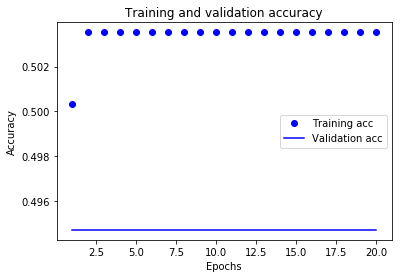

In [11]:
#绘制训练精度和验证精度
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
#从头开始重新训练一个模型
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=8, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/8
25000/25000 [==============================] - 5s 211us/step - loss: 0.6932 - acc: 0.4991
Epoch 2/8
25000/25000 [==============================] - 6s 224us/step - loss: 0.6932 - acc: 0.4961
Epoch 3/8
25000/25000 [==============================] - 5s 200us/step - loss: 0.6932 - acc: 0.4999
Epoch 4/8
25000/25000 [==============================] - 5s 193us/step - loss: 0.6932 - acc: 0.4959
Epoch 5/8
25000/25000 [==============================] - 5s 194us/step - loss: 0.6932 - acc: 0.4895 0s - loss: 0.6932 - acc
Epoch 6/8
25000/25000 [==============================] - 5s 193us/step - loss: 0.6932 - acc: 0.4948
Epoch 7/8
25000/25000 [==============================] - 5s 193us/step - loss: 0.6931 - acc: 0.4988
Epoch 8/8
25000/25000 [==============================] - 9s 345us/step


In [13]:
results

[0.693152287902832, 0.5]